# Imports
numpy, pandas, sklearn, matplotlib을 사용할 것이다.

In [1]:
#numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing : 범주형 변수를 다루기 위함
from sklearn.preprocessing import LabelEncoder

# File system management
import os

# 에러 억제
import warnings
warnings.filterwarnings('ignore')

# 시각화 모듈 임포트 : 매트플립과 시본
import matplotlib.pyplot as plt
import seaborn as sns


# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer



# 데이터 불러와 읽기
우선, 우리는 데이터 파일들을 이용이 가능하게 가져올 수 있다. 총 9개의 파일인데, 1개의 훈련세트, 1개의 테스트 세트, 1개의  제출 파일, 6개의 추가정보 파일이 있다.

In [2]:
# 가능한 파일 목록
print(os.listdir('home-credit-default-risk'))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
# Training data
app_train = pd.read_csv('home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


훈련데이터는 307511개가 있고 타켓피처를 포함한 122개의 피처가 있다.

In [4]:
#Testing data features
app_test = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Testing data shape : ', app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트 셋은 상당히 더 작고 타켓 컬럼을 포함하지 않는다.

# Exploratory Datat Analysis
EDA는 우리가 수리통계를 계산하거나 데이터안에서 경향,변칙,패턴 그리고 관계 등에 대한 피겨를 만드는 과정을 말한다. EDA의 목적은 우리의 데이터가 우리에게 뭘 말할 수 있을 까는 배우는 것이다. 이것은 일반적으로 높은 수준의 overview로 시작해서 우리가 특이점을 찾은 세부부분으로 간다. 우리가 찾은 것은 우리를 흥미롭게 할 수도 이쏙, 우리가 어떤 모델을 선택할지 알려주고, 우리가 어떤 피처를 사용할지를 결정하는 것에 도움을 준다. 

## Examine the Distribution of the Target Column
우리가 예측해야하는 타겟 : 대출에 대한 0은 제 시간에 상환되었거나, 고객이 지불에 어려움을 겪었음을 나타내는 1이다.
    우리는 먼저 각 범주에 속하는 대출의 수를 조사할 수 있다.

In [5]:
app_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

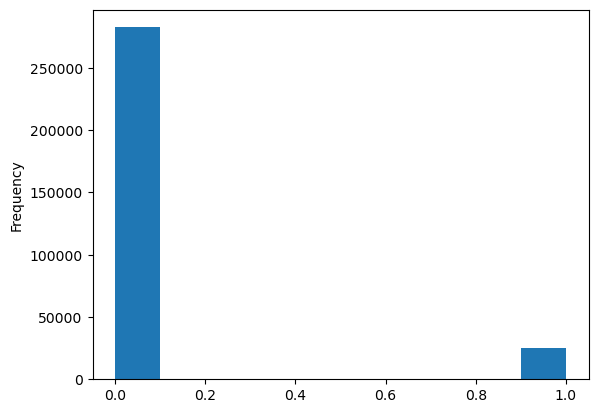

In [6]:
app_train["TARGET"].astype(int).plot.hist()

이 정보들로부터, 우리는 클래스 불균형을 볼 수 있다. 상환되지 않은 대출보다 저 때 상환된 대출이 훨씬 더 많다. 일단 우리가 더 정교한 기계 학습 모델에 들어가면, 우리는 이런한 불균형을 반영하기 위해 더이터의 표현으로 클래스에 가중치를 부여할 수 있다.

## 결측치 확인
다음으로 우리는 각 컬럼의 결측치의 수와 비율을 확인 할 것이다.

In [7]:
# Function to calcuate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = { 0 : "Missing Values", 1 : "% of Total Values"})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1 ]!=0].sort_values(
            "% of Total Values", ascending= False).round(1)
        
        
    # Print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + "columns.\n"
         "There are" + str(mis_val_table_ren_columns.shape[0]) + 
         "columns that have missing values")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [8]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122columns.
There are67columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


기계학습 모델을 구축할 때가 되면, 우리는 이런한 누락된 값(계산으로 알려주는)을 채워야할 것이다. 이후 작업에서, 우리는 전가할 필요 없이 누락도니 값을 처리할 수 있는 SGBoost와 같은 모델을 사용할 것이다. 또 다른 옵션은 누락된 값을 비율이 높은 열을 삭제하는 것이지만, 이러한 열이 우리 모델에 도움이 돌지 미리 아는 것은 불가능하다. 그러므로, 우리는 당분간 모든 컬럼을 유지할 것입니다.

## Column Types

각 데이터 유형의 열 수를 살펴보겠습니다.
int64 와 float64는 숫자 변수(이산적이거나 연속적일 수도 있음)입니다. 
격체 열은 문자열을 포함하고 범주형 특징입니다.

In [9]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
list(app_train.columns).index('TARGET')

1

object 타입(범주형) 컬럼들의 유일값 수를 확인해보자.

In [11]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수들은 매우 적은 유일값 수를 가지고 있습니다. 우리는 이런 범두형 변수를 다루는 방법을 찾을 필요가 있습니다.

# Encoding Categorical Variables
우리가 더 나아가기 전에, 우리는 성가신 범주형 변수를 다룰 필요가 있다. 불행히도 기계 학습 모델은 범주형 변수를 처리할 수 없습니다.(LightGBM과 같은 일부 모델 제외) 
따라서, 우리는 이 변수들을 모델에 넘겨주기 ㄱ전에 숫자로 인코딩(표현)하는 방법을 찾아야한다. 이 과정을 수행하는 두가지 주요 방법이 있습니다.

- 1) 라벨 인코딩 : 정수로 범주형 변수의 각 고유한 범주를 할당합니다. 새로운 열은 생성되지 않습니다.
- 2) 원핫 인코딩 : 범주형 변수의 각 고유한 범주에 대한 새 열을 만드세요. 각 관찰은 해당 범주에 대해 열에서 1을 받고 다른 모든 새로운 열에서 0을 받는다.

라벨 인코딩의 문제는 카테고리에 임의의 순서를 제공한다는 것입니다. 각 범주에 할당된 값은 무작위이며 범주의 고유한 측면은 반영하지 않습니다. 위의 예에서 프로그래머는 4를 받고 데이터 과학자는 1을 받았지만, 우리가 같은 과정을 다시 한다면, 라벨은 뒤집히거나 완전히 다를 수 있습니다. 정수의 실제 할당은 임의적입니다. 따라서, 우리가 라벨 인코딩을 수행할 때, 모델은 우리가 원하는 것이 아닌 가중치를 할당하기 위해 기능의 상대적 값(예 : 프로그래머 = 4 및 데이터 과학자 = 1)을 사용할 수 있습니다. 범주형 변수(예 : 남성/여성)에 대해 두 개의 고유한 값만 있다면, 라벨 인코딩은 괜찮지만, 2개 이상의 고유한 범주의 경우, 하나의 핫 인코딩이 안전한 옵션입니다.

이러한 접근 방식의 상대적인 장점에 대한 논쟁이 있으며, 일부 모델은 문제 없이 라벨로 인코딩된 범주형 변수를 다룰 수 있습니다. 개인적인 의견이지만 많은 클래스를 가진 범주형 변수에 대해, 원핫 인코딩은 범주에 임의의 값을 부과하지 않기 때문에 가장 안전한 접근 방식이라고 생각한다. 원핫 인코딩의 유일한 단점은 기능의 수(데이터의 차원)가 많은 범주의 범주형 변수로 폭발할 수 있다는 것이다. 이를 처리하기 위해, 우리는 (여전히 정보를 보존하려고 노력하면서) 차원의 수를 줄이기 위해 PCA 또는 다른 차원 감소 방법에 이어 하나의 핫 인코딩을 수행할 수 있습니다.

이 노트북에서, 우리는 2개 이상의 범주형 변수에 대해 라벨 인코딩을 사용하고 2개의 범주형 변수에 대해 원핫 인코딩을 사용할 것이빈다. 이 과정은 우리가 프로젝트에 더 깊이 들어가면서 바뀌어야 할 수도 있지만, 현재로서는 이것이 우리를 어디로 데려가는지 보게 될 것이다.
(우리는 또한 이 노트북에서 차원 감소를 사용할지 않을 것이지만 향후 반복에서 사용할 것입니다.)

## Label Encoding and One-Hot Encoding
위에서 설명했던 것들을 구현해 봅시다. : 2개의 고유한 범주를 가진 범주형 변수(dtypes == object)의 경우, 우리는 라벨 인코딩을 사용할 것이며, 2개이상의 고유한 범주를 가진 범주형 변수의 경우, 우리는 원핫 인코딩을 사용할 것입니다. 

라벨 인코딩을 위해, 우리는 Scikit-Learn LabelEncoder를 사용하고 원핫 인코딩을 위해 pandas get_dummies(df) 함수를 사용할 것입니다.

In [12]:
#Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train :
    if app_train[col].dtype == "object":
        # if 2 of fewer unique categories
        if len(list(app_train[col].unique())) <=2 :
            le.fit(app_train[col])
            #Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # keep track of how many columns were label encoded
            le_count += 1
        
print("%d columns were label encoded."%le_count)

3 columns were label encoded.


In [13]:
list(app_train.columns).index('TARGET')

1

In [14]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Feature shape: ', app_train.shape)
print('Testing Feature shape: ', app_test.shape)

Training Feature shape:  (307511, 243)
Testing Feature shape:  (48744, 239)


In [15]:
list(app_train.columns).index('TARGET')

1

## Aligning Training and Testing Data
훈련과 테스트 데이터 모두에 동일한 기능(열)이 있어야 합니다. 원 핫 인코딩은 테스트 데이터에 표시되지 않는 범주형 변수가 있었기 때문에 훈련 데이터에 더 많은 열을 만들었습니다. 테스트 데이터에 없는 훈련 데이터의 열을 제거하려면 데이터 프레임을 정렬해야합니다. 먼저 우리는 훈련 데이터에서 대상 열을 추출합니다.(이것은 테스트 데이터에 없지만 이 정보를 유지해야 하기 떄문입니다.) 정렬을 할 때, 행이 아닌 열을 기반으로 데이터 프레임을 정렬을 할 때, 행이 아닌 열을 기반을 데이터 프레임을 정렬하기 위해 축 =1을 설정해야합니다.

In [16]:
train_labels = app_train["TARGET"]

#Align the training and testing data, keep data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = "inner", axis = 1)

# Add teh target back in
app_train['TARGET'] = train_labels

print('Training Features shape : ', app_train.shape)
print('Testing Features shape : ', app_test.shape)


Training Features shape :  (307511, 240)
Testing Features shape :  (48744, 239)


훈련 및 테스트 데이터 세트는 이제 기계학습에 필요한 것과 동일한 기능을 가지고 있다. 원 핫 인코딩으로 인해 기능의 수가 크게 증가했다. 어느 시점에서 우리는 아마도 데이터 세트의 크기를 줄이기 위해 차원감소(관련되지 않은 기능 제거)를 시도하고 싶을 것입니다.

# Back to Exploratory Data Analysis

## Anomailes(변칙)
EDA를 할 때 우리가 항상 경계하고 싶은 한가지 문제는 데이터 내의 이상치이다.
이것들은 잘못 입력된 숫자, 측정 장비의 오류 때문일 수도 있고, 유효하지만, 극단적인 측정일 수도 있다. 이상을 정략적으로 지원하는 한 가지 방법은 설명 방법을 상요하여 열의 통계를 보는 것이다.
DAYS_BIRTH 열의 숫자는 현재 대출 신청서와 관련하여 기록되기 떄문에 음수 입니다. 몇 년동안 이러한 통계를 보기 우해, 우리는 -1로 숫자를 곱하고 한 해의 일 수로 나눌 수 있습니다.

In [17]:
(app_train["DAYS_BIRTH"] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

그 나이들은 합리적으로 보인다. 하이 엔드나 로우 엔트의 나이에 대한 이상값은 없다. 고용일은 어떠한가?

In [18]:
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

이것은 옳지 않아보인다. 최대 가치는(긍적인 것 외에) 약 1000년이다.

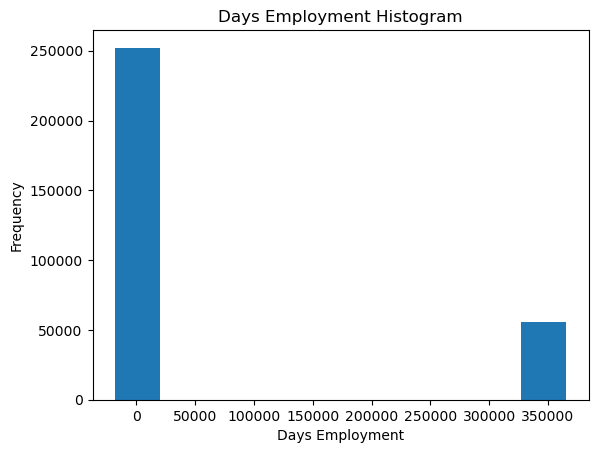

In [19]:
app_train["DAYS_EMPLOYED"].plot.hist(title = "Days Employment Histogram");
plt.xlabel("Days Employment");

가볍게, 변칙적인 고객을 하위 집합하고 그들이 나머지 고객들보다 더 높거나 낮은 채무 불이행률을 보이는 경향이 있는지 봅시다.

In [20]:
anom = app_train[app_train["DAYS_EMPLOYED"] == 365243]
non_anom = app_train[app_train["DAYS_EMPLOYED"] != 365243]
print('The non-anomalies default on %0.2f%% of loans'%(100* non_anom["TARGET"].mean()))
print('The anomalies default on %0.2f%% of loans'%(100* anom["TARGET"].mean()))
print('There are %d anomalous days of employment'%len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


역시 흥미롭습니다. 변칙적인 고객이 채무 불이행률이 더 낮다는 것이 밝혀졌습니다.

변칙을 처리하는 것은 정해진 규칙 없이 정확한 상황에 달려 있습니다. 가장 안전한 방법 중 하나는 변칙을 누락된 값으로 설정한 다음 기계 학습 전에 (전산을 사용하여) 작성하는 것입니다. 이 경우, 모든 변칙이 정확히 같은 값을 가지고 있기 때문에, 우리는 이러한 모든 대출이 공통점을 공유할 경우를 대비하여 동이한 값으로 채우고 싶습니다. 변칙적인 값은 어느 정도 중요한 것 같기 때문에 우리가 실제로 이러한 값을 채웠다면 기계 학습 모델을 말하고 싶습니다. 해결책으로, 우리는 숫자(np.nan)가 아닌 변칙적인 값을 채운 다음 값이 변칙적인지 여부를 나타내는 새로운 불리언 열을 만들것입니다.

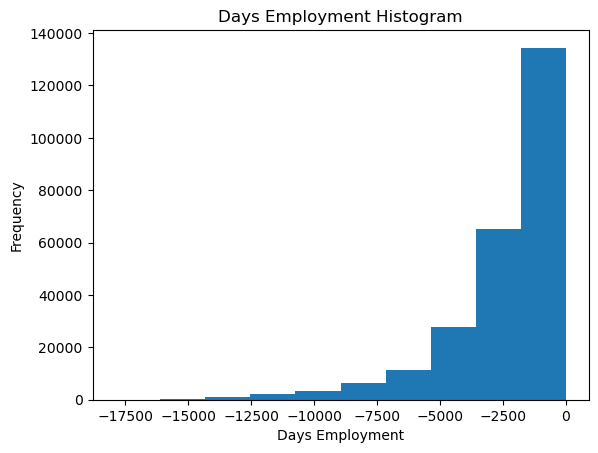

In [21]:
# Create an anomalous flag column
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train["DAYS_EMPLOYED"].replace({365243:np.nan}, inplace = True)

app_train["DAYS_EMPLOYED"].plot.hist(title = "Days Employment Histogram");
plt.xlabel("Days Employment");

분포는 우리가 기대하는 것과 훨씬 더 일치하는 것으로 보이며, 우리는 또한 이러한 값이 원래 변칙적이라는 것을 원래 변칙적이라는 것을 모델에 알리기 위해 새로운 열을 만들었습니다.(우리는 nans로 일부값을 채우고, 아마도 열의 중앙값으로 채워야 하기 때문이다.) 데이터 프레임에 DAYS가 있는 다른 열들은 명백한 이상치 없이 우리가 기대하는 것에 관한 것으로 보인다. 

매우 중요한 것은, 우리가 훈련 데이터에 대해 하는 모든 것은 테스트 데이터에 대해서도 해야한다. 새 열을 만들고 테스트 데이터에서 np.nan.으로 기존 열을 채우도록 합니다.

In [22]:
app_test["DAYS_EMPLOYED_ANOM"] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243 : np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries'%(app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))
      

There are 9274 anomalies in the test data out of 48744 entries


## Correlations
이제 범주형 변수와 이상값을 다뤘으니, EDA를 계속해 봅시다. 데이터를 시도하고 이해하는 한가지 방법은 기능과 대상 사이의 상관관계를 찾는 것입니다. .corr 데이터 프레임 방법을 사용하여 모든 변수와 대상 사이의 피어슨 상관 계수를 계산할 수 있습니다.

상관계수는 특징의 "관련성"을 나타내는 가장 큰 방법은 아니지만, 데이터 내에서 가능한 관계에 대한 아이디어를 제공합니다.
상관관계의 절대값에 대한 몇 가지 일반적인 해석은 다음과 같다 :
- .00 - 0.19 "매우 약함"
- 0.20 - 0.39 "약함"
- 0.40 - 0.59 "보통"
- 0.60 - 0.79 "강함"
- 0.80 - 1.0 "매우 강함"

In [23]:
# Find correlations with the target and sort
correlations = app_train.corr()["TARGET"].sort_values()

# Display correlations
print('Most Positivie Correlations : \n', correlations.tail(15))
print("\nMost Negative Correlations : \n", correlations.head(15))

Most Positivie Correlations : 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Neg

좀 더 중요한 상관관계를 살펴봅시다 :
DAYS_BIRTH는 가장 긍정적인 상관관계입니다.(변수와 그 자체의 상관관게는 항상 1이기 떄문에 TARGET을 제외하고) 문서를 보면, DAYS_BIRTH는 대출 당시 부정적인 날의 고객의 나이입니다.(어떤 이유에서든!) 상관관계는 긍정적이지만, 이 기능의 가치는 실제로 부정적이며, 이는 고객의 나이가 들어감에 따라 대출을 불이행할 가능성이 적다는 것을 의미합니다.(즉, 목표 == 0) 그것은 조금 혼란스럽기 때문에, 우리는 그 기능의 절대값을 취할 것이고 상관관계는 음수가 될 것입니다.

## Effect of Age on Repayment

In [24]:
# Find the correlation of the positive days since birth and target
app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])
app_train["DAYS_BIRTH"].corr(app_train["TARGET"])

-0.07823930830982737

고객이 나이가 드렁감에 따라, 목표가 부정적인 선형 관계가 있는데, 이는 고객이 나이가 들어감에 따라 대출을 더 자주 상환하는 경향이 있다는 것을 의미한다.

이 변수를 살펴보기 시작합니다. 먼저, 우리는 나이의 히스토그램을 만들 수 있다. 우리는 그래프를 더 이해할 수 있도록 x축을 넣을 것이다.

Text(0, 0.5, 'Count')

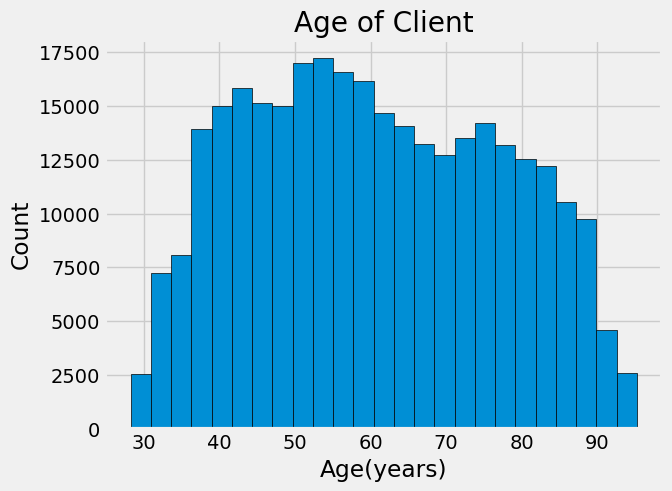

In [25]:
#Set teh style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train["DAYS_BIRTH"]/ 265, edgecolor = 'k', bins = 25)
plt.title("Age of Client"); 
plt.xlabel("Age(years)")
plt.ylabel("Count")

그 자체로, 나이의분포는 모든 연령대가 합리적이기 때문에 이상값이 없다느 ㄴ것 외에는 우리가 많은 것을 말해주지 않는다. 목표가 목표에 미치는 영향을 시각화하기 위해, 우리는 다음으로 목표의 값을 색칠된 커널 밀도 추정 플롯(KDE)을 만들 것이다. 커널 밀도 추정 플롯은 단일 변수의 분포를 부여주며 평활화된 히스토그램으로 생각할 수 있다(각 데이터 지점에서 커널, 보통 가우스를 계산한 다음 모든 개별 커널을 평균하여 단일 매끄러운 곡선을 개발함으로써 생성된다.) 우리는 이 그래프에 seaborn kdeplot을 사용할 것이다.

Text(0.5, 1.0, 'Distrubution of Ages')

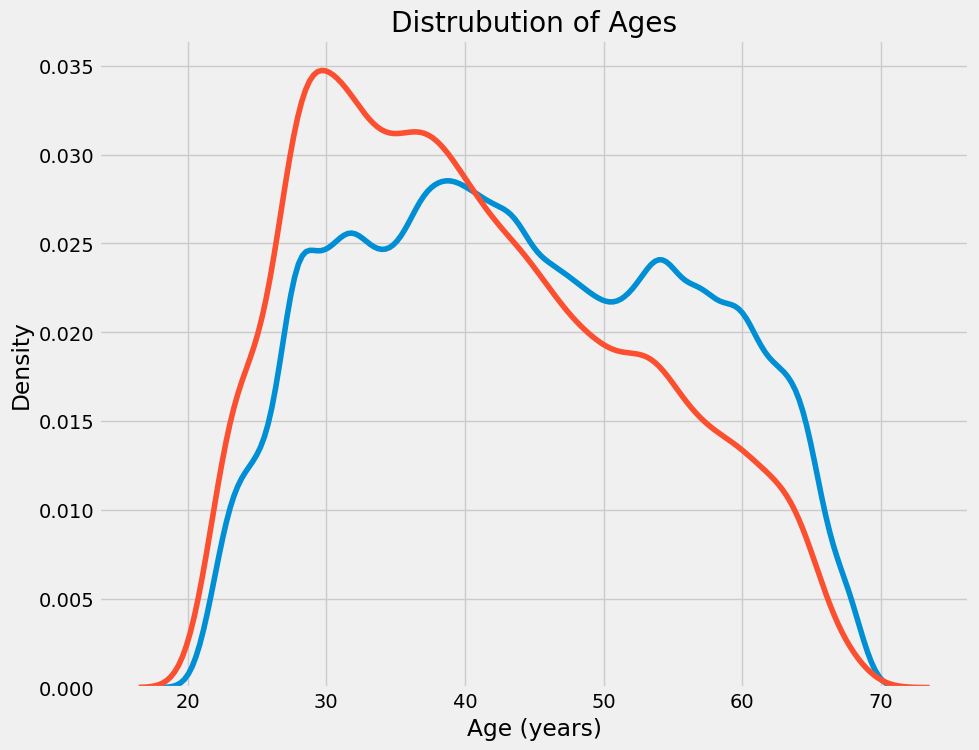

In [26]:
plt.figure(figsize = (10,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train["TARGET"] == 0 , "DAYS_BIRTH"]/365, label = "target == 0")

#KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train["TARGET"] == 1 , "DAYS_BIRTH"]/365, label = "target == 1")

#Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel("Density"); plt.title("Distrubution of Ages")

목표 == 1 곡선은 범위의 끝이 더 젊은 쪽을 향해 있다. 이것은 중요한 상관관계(-0.07 상관계수)는 아니지만, 이 변수는 대상에 영향을 미치기 떄무넹 기계 학습 모델에 유용할 것이다. 이 관계를 다른 방식으로 살펴봅시다 : 연령대별 대출 상환의 평균 실패

이 그래프를 만들기 위해, 먼저 윌는 연령 범주를 각각 5년의 bins로 줄였다. 그런 다음, 각 bins에 대해 우리는 목표의 평균 가치를 계산하며, 이는 각 연령 범주에서 상환되지 않은 대출의 비율을 알려줍니다.


In [27]:
# Age imformation into a separate dataframe
age_data = app_train[["TARGET", "DAYS_BIRTH"]]
age_data["YEARS_BIRTH"] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data["YEARS_BINNED"] = pd.cut(age_data["YEARS_BIRTH"], bins = np.linspace(20,70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [28]:
# Group by the bin and calculate averages
age_groups = age_data.groupby("YEARS_BINNED").mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

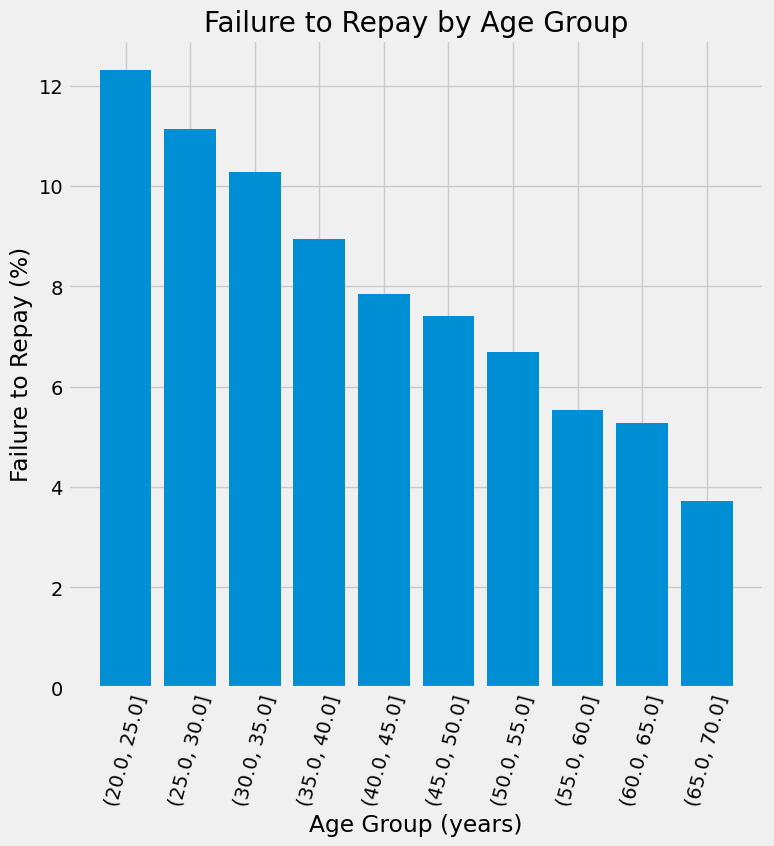

In [29]:
plt.figure( figsize = (8,8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100* age_groups["TARGET"])
        
# Plot labeling
plt.xticks(rotation = 75); 
plt.xlabel("Age Group (years)"); 
plt.ylabel("Failure to Repay (%)")
plt.title("Failure to Repay by Age Group")

분명한 추세가 있다: 젊은 지원자들은 대출을 갚지 않을 가능성이  더 높다. 상환 실패율은 가장 어린 세 연령대의 겨우 10%이상이고 가장 오래된 연령대의 경우 5%이상이다. 



이것은 은행에서 직접 사용할 수 있는 정보입니다.: 젊은 고객은 대출을 상환할 가능성이 적기 때무넹 더 많은 지침이나 재무 계획 팁을 제공해야 할 수도 있습니다. 이것은 은행이 젊은 고객을 차별해야 한다는 것을 의미하지는 않지만, 젊은 고객이 제 시간에 지불할 수 있도록 예방 조치를 취하는 것이 현명할 것입니다.

## Exteror Sources
대상과 가장 강한 음의 상관관계를 가진 3개의 변수는 EXT_SOURCE_1, EXT_SOURCE_2 EXT_SOURCE_3이다. 문서에 따르면 이런한 기능은 "외부 데이터 소스의 정규화된 점수"를 나타낸다. 나는 이것이 정확히 무엇을 의미하는지 모르겠지만, 수많은 데이터 소스를 사용하여 만들어진 누적된 신용등급일 수 있다.

이 변수들을 살펴봅시다.
먼저, 우리는 대상과 서로의 EXT_SOURCE 기능의 상관관계를 보여줄 수 있습니다.

In [30]:
#Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', "EXT_SOURCE_1", 'EXT_SOURCE_2', "EXT_SOURCE_3", 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


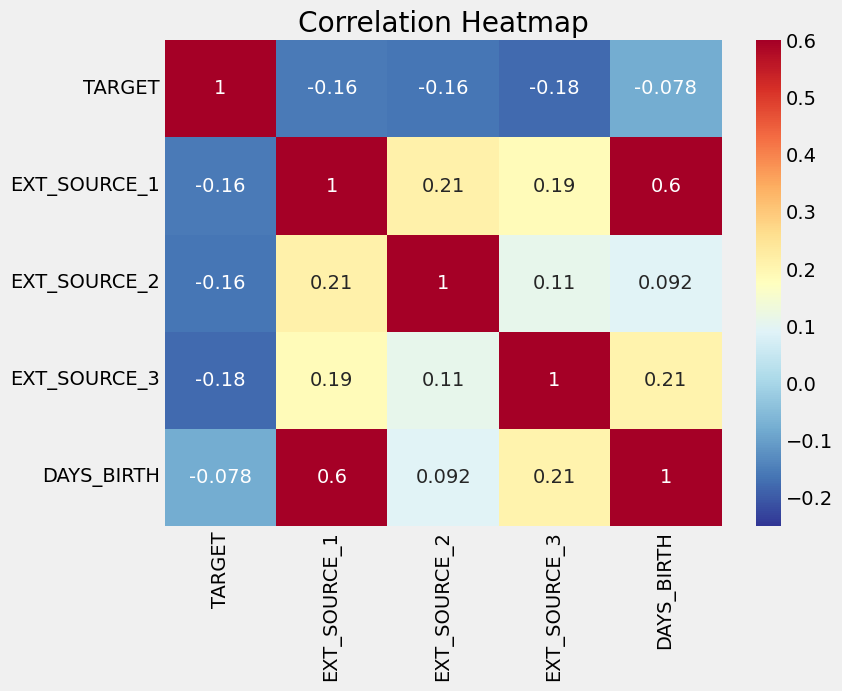

In [31]:
plt.figure(figsize = (8,6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

세가지 EXT_SOURCE 기능 모두 대상과 부정적인 상관관계가 있으며, 이는 EXT_SOURCE의 가치가 증가함에 따라 고객이 대출을 상환할 가능성이 더 높다느 것을 나타냅니다. 우리는 또한 DAYS_BIRTH가 EXT_SOURCE_!과 긍정적으로 연관되어 있다는 것을 알 수 있으며, 이는 이 점수의 요인 중 하나가 고객 연령임을 나타냅니다.


다음으로 우리는 대상의 값에 따라 색칠된 각 기능의 분포를 볼 수 있습니다. 이것은 우리가 이 변수가 목표에 미치는 영향을 시각화 할 수 있게 해줄 것입니다.

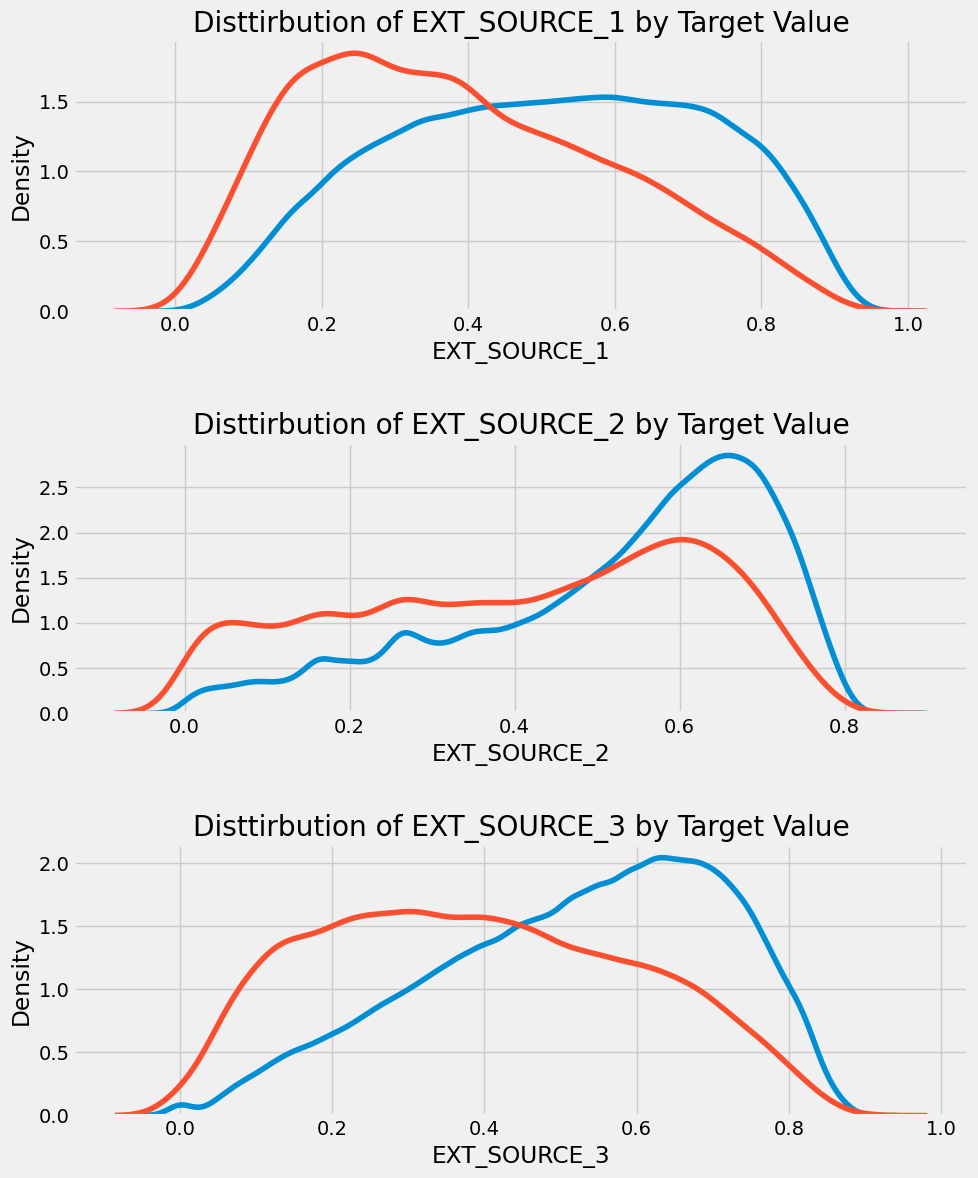

In [32]:
plt.figure(figsize = (10,12))

# iterate through the sources
for i , source in enumerate(["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]):
    
    # create a new subplot for each source
    plt.subplot(3,1, i +1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = "target == 0")
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train["TARGET"] == 1, source], label = "target == 1")
    
    # Label the plots
    plt.title('Disttirbution of %s by Target Value' % source)
    plt.xlabel("%s"%source); plt.ylabel("Density");
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3은 대상 값의 가장 큰 차이를 표시합니다. 우리는 이 기능이 신청자가 대출을 상환할 가능성과 관련이 있다는 것을 분명히 알 수 있습니다. 그 관계는 그다지 강하지 않습니다(사실 그들은 모두 매우 약한 것으로 간주되지만 , 이런한 변수들은 신청자가 제 시간에 대출을 상환할지 여부를 예측하는 기계 학습 모델에 여전치 유용할 것입니다.)

## Pairs Plot
최종 탐색 플롯으로, 우리는 EXT_SOURCE 변수와 DAYS_BIRTH 변수의 쌍 플롯을 만들 수 있습니다. 페어 플롯은 단일 변수의 분포뿐만 아니라 여러 변수 쌍 간의 관계를 볼 수 있기 때문에 훌륭한 탐색 도구 입니다. 여기서 우리는 seaborn 시각화 라이브러리와 PairGrid 함수를 사용하여 상단 삼각형의 산점도, 대각선의 히스토그램, 하단 삼각형의 2D 커널 밀도 플롯 및 상관 계수가 있는 쌍의 플롯을 만들고 있습니다.

네가 이 코드를 이해하지 못했어도 괜찮습니다. 파이썬에서 플로팅하는 것은 지나치게 복잡할 수 있으며, 가장 간단한 그래프를 넘어서는 모든 것에 대해, 나는 보통 기존 구현을 찾고 코드를 조정합니다.( 스스로 반복하지 마세요!)

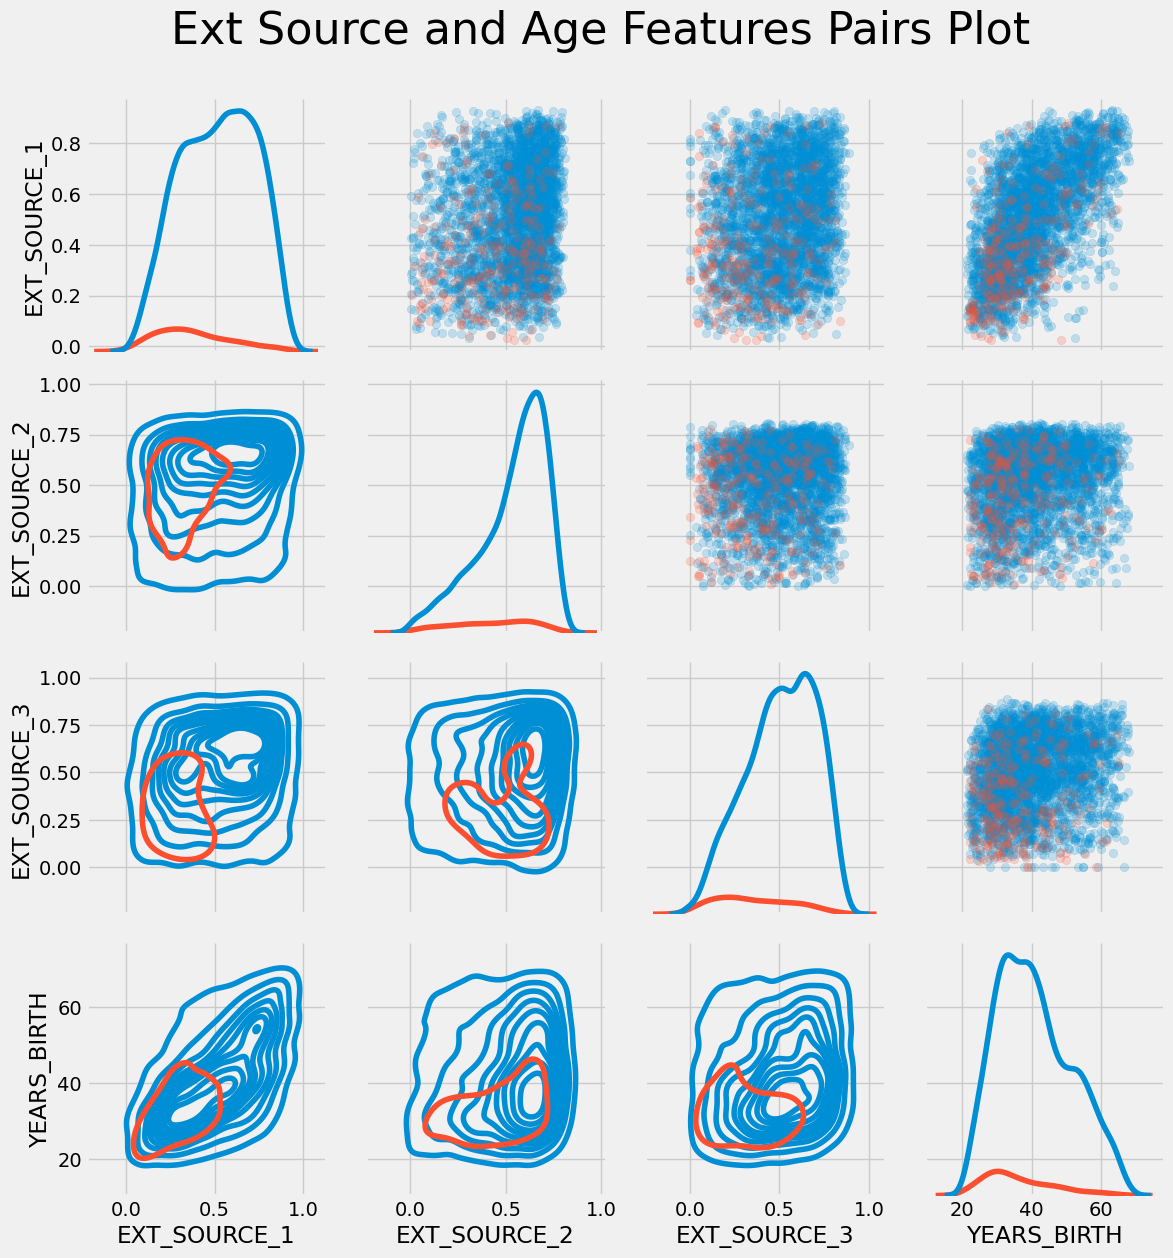

In [33]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ["DAYS_BIRTH"]).copy()

# Add in the age of the client in years
plot_data["YEARS_BIRTH"] = age_data["YEARS_BIRTH"]

# Drop na values and limit to first 10000 rows
plot_data = plot_data.dropna().loc[:10000,:]

# Function to calculate corraltion coefficient between two columns
def corr_func(x,y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r),
               xy=(.2, .8), xycoords=ax.transAxes,
               size = 28)
    
    
# Create the pairgird object
grid = sns.PairGrid(data = plot_data ,height = 3, diag_sharey = False,
                   hue = 'TARGET',
                   vars = [x for x in list(plot_data.columns) if x !='TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', fontsize = 32, y = 1.05);

이 플롯에서 빨간색은 상환되지 않은 대출을 나타내고 파란색은 상한된 대출을 나타냅니다. 우리는 데이터 내의 다야한 관계를 볼 수 있습니다. EXT_SOURCE_1과 DAYS_BIRTH(또는 이와 동등한 YEARS_BIRTH) 사이에 적당한 양의 선형 관계가 있는 것으로 보이며, 이는 이 기능이 고객의 나이를 고려할 수 있음을 나타냅니다.

# Feature Engineering
Kaggle 대회는 기능 엔지니어링에 의해 승리한다: 그 승리는 데이터에서 가장 유용한 기능을 만들 수 있는 사람들이다.(적어도 구조화된 데이터의 경우, 이기는 모델은 대부분 사실이며, 모두 그라디언트 부스트의 변형인 경향이 있다.) 이것은 기계 학습의 패턴 중 하나를 나타냅니다: 기능 엔지니어링은 모델 구축 및 하이퍼파라미터 튜닝보다 투자 수익률이 더 큽니다. 이것은 그 주제에 대한 훌륭한 기사이다.) Andrew Ng의 말처럼 " 응용 기계 학습은 기본적으로 기능 공학이다."

올바른 모델과 최적의 설정을 선택하는 것이 중요하지만, 모델은 주어진 데이터에서만 배울 수 있다. 이 데이터가 가능한 한 작업과 관련이 있는지 확인하는 것은 데이터 과학자의 일입니다.(그리고 아마도 우리를 도울 수 있는 몇 가지 자동화된 도구)

기능 엔지니어링은 유전자 프로세스를 말하며 기능 구성을 모두 포함할 수 있습니다. 기존 데이터에서 새로운 기능 추가 및 기능 선택 : 가장 중요한 기능 또는 차원 감소의 다른 방법만 선택합니다. 기능을 만들고 기능을 선택하는 데 사용할 수 있는 많은 기술이 있습니다.

우리는 다른 데이터 소스를 사용하기 시작할 때 많은 기능 엔지니어링을 할 것이지만, 이 노트북에서는 두가지 간단한 기능 구성 방법만 시도할 것입니다.
- Polynomial features
- Domin Knowledge features

## Polynomial Features
한 가지 간단한 특징 구성 방법은 다항식 특징이라고 불린다. 이 방법으로, 우리는 기존 기능의 힘과 기존 기능 간의 상호작용 용어인 기능을 만듭니다. 예를 들어, 우리는 EXT_SOURCE_1^2와 EXT_SOURCE_2^2와 EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2와 같은 변수를 만들 수 있습니다. 여러 개별 변수의 조합인 이러한 기능은 변수 간의 상호작용이라고 불린다. 즉, 두 변수 자체가 대상에 강한 영향을 미치지 않을 수 있지만, 단일 상호 작용 변수로 결합하면 대상과의 관계를 보여줄 수 있습니다. 상호 작용 용어는 여러 변수의 효과를 포착하기 위해 통계 모델에서 일반적으로 사용되지만 기계 학습에서 자주 사용되는 것을 볼 수 없다. 그럼에도 불구하고, 우리는 고객이 대출을 갚을지 여부를 예측하는데 도움이 될 수 있는지 확인하기 위해 몇 가지를 시도해 볼 수 있다.

Jake VanderPlas는 더 많은 정보를 원하는 사람들을 위해 그의 훌륭한 책 Python for Data Science에서 다항식 기능에 대해 쓰여있습니다.

다음 코드에서, 우리는 EXT_SOURCE변수와 DAYS_BIRTH 변수를 사용하여 다항식 기능을 만듭니다. Scikit-Learn에는 지정된 정도까지 다항식과 상호작용 용어를 만드는 PolynomialFeatures라는 유용한 클래스가 있습니다. 우리는 결과를 보기 위해 3의 정도를 사용할 수 있습니다(다항식 특징을 만들떄, 우리는 기능의 수가 정도에 따라 기하급수적으로 확장되기 때문에, 그리고 오버피팅에 문제가 발생할 수있기 때문에 너무 높은 학위를 사용한는 것을 피하고 싶습니다.)

In [34]:
# Make a new dataframe for polynomial features
poly_features = app_train[["EXT_SOURCE_1", 'EXT_SOURCE_2', "EXT_SOURCE_3", "DAYS_BIRTH", "TARGET"]]
poly_features_test = app_test[["EXT_SOURCE_1", 'EXT_SOURCE_2', "EXT_SOURCE_3", "DAYS_BIRTH"]]


# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

poly_target = poly_features["TARGET"]

poly_features = poly_features.drop(columns = ["TARGET"])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with sepcified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [35]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print("Polynomial Features shape: ", poly_features.shape)

Polynomial Features shape:  (307511, 35)


이것은 상당한 수의 새로운 기능을 만들어낸다. 이름을 얻으려면 다항식 기능 get_feature_names 메서드를 사용해야 합니다.

In [36]:
poly_transformer.get_feature_names_out(input_features = ["EXT_SOURCE_1", "EXT_SOURCE_2",
                                                     "EXT_SOURCE_3", "DAYS_BIRTH"])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

최대 3단계와 상호 작용 용어까지 상승된 개별 기능을 갖춘 35개의 기능이 있습니다. 이제, 우리는 이러한 새로운 기능 중 어느 것이 목표와 관련이 있는지 알 수 있습니다.

In [37]:
#Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                            columns = poly_transformer.get_feature_names_out(["EXT_SOURCE_1", "EXT_SOURCE_2", 
                                                                           "EXT_SOURCE_3", "DAYS_BIRTH"]))

# Add in the target
poly_features["TARGET"] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()["TARGET"].sort_values()

#Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


새로운 변수 중 몇몇은 원래의 특징보다 목표와 더 큰 ( 절대 크기 측면에서) 상관관계를 가지고 있다. 우리가 기계 학습 모델을 만들 떄, 우리느 이러한 기능의 유무에 관계없이 실제로 모델 학습에 도움이 되는지 결정할 수 있습니다.


우리는 이러한 기능을 교육 및 테스트 데이터 사본에 추가한 다음 기능이 있거나 없는 모델을 평가할 것입니다. 기계학습에서 여러번, 접근 방식이 효과가 있을지 알 수 있는 유일한 방법은 그것을 시도하는 것입니다.

In [38]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


# Domain Knowledge Features
내가 신용 전문가가 아니기 떄문에 이것을 "도메인 지식"이라고 부르는 것이 완전히 옳지 않을 수도 있지만, 아맏 ㅗ우리는 이것을 "제한된 금융 지식을 적용하려는 시도"라고 부를 수 있을 것입니다. 이 마음가짐에서, 우리는 고객이 대출을 불이행할지 여부를 알려주는데 중요하다고 생각하는것을 포착하려고 시도하는 몇 가지 기능을 만들 수 있습니다. 여기서 나는 Aguiar의 이 스크림트에서 영감을 받는 다섯 가지 기능을 사용할 것입니다.

- CREDIT_INCOME_PERCENT: 고객의 소득에 대한 신용 금액의 비율
- ANNUITY_INCOME_PERCENT: 고객의 소득 대비 대출 연금의 비율
- CREDIT_TERM: 월별 지불 기간(연금이 월별 금액이기 때문에
- DAYS_EMPLOYED_PERCENT: 고객의 나이에 비해 고용된 일수의 비율

다시 말하지만, Aguiar와 이러한 기능을 탐구한 그의 훌륭한 스크립트 덕분입니다.

In [39]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain["CREDIT_INCOME_PERCENT"] = app_train_domain["AMT_CREDIT"] / app_train_domain["AMT_INCOME_TOTAL"]
app_train_domain["ANNUITY_INCOME_PERCENT"] = app_train_domain["AMT_ANNUITY"] / app_train_domain["AMT_INCOME_TOTAL"]
app_train_domain["CREDIT_TERM"] = app_train_domain["AMT_ANNUITY"] / app_train_domain["AMT_CREDIT"]
app_train_domain["DAYS_EMPLOYED_PERCENT"] = app_train_domain["DAYS_EMPLOYED"] / app_train_domain["DAYS_BIRTH"]

In [40]:
app_test_domain["CREDIT_INCOME_PERCENT"] = app_test_domain["AMT_CREDIT"] / app_test_domain["AMT_INCOME_TOTAL"]
app_test_domain["ANNUITY_INCOME_PERCENT"] = app_test_domain["AMT_ANNUITY"] / app_test_domain["AMT_INCOME_TOTAL"]
app_test_domain["CREDIT_TERM"] = app_test_domain["AMT_ANNUITY"] / app_test_domain["AMT_CREDIT"]
app_test_domain["DAYS_EMPLOYED_PERCENT"] = app_test_domain["DAYS_EMPLOYED"] / app_test_domain["DAYS_BIRTH"]

### Visualize New Variables
우리는 이러한 도메인 지식 변수를 시각적으로 탐구해야 한다. 이 모든 것에 대해, 우리는 TARGET의 값으로 색칠된 동일한 KDE플롯을 만들 것입니다.

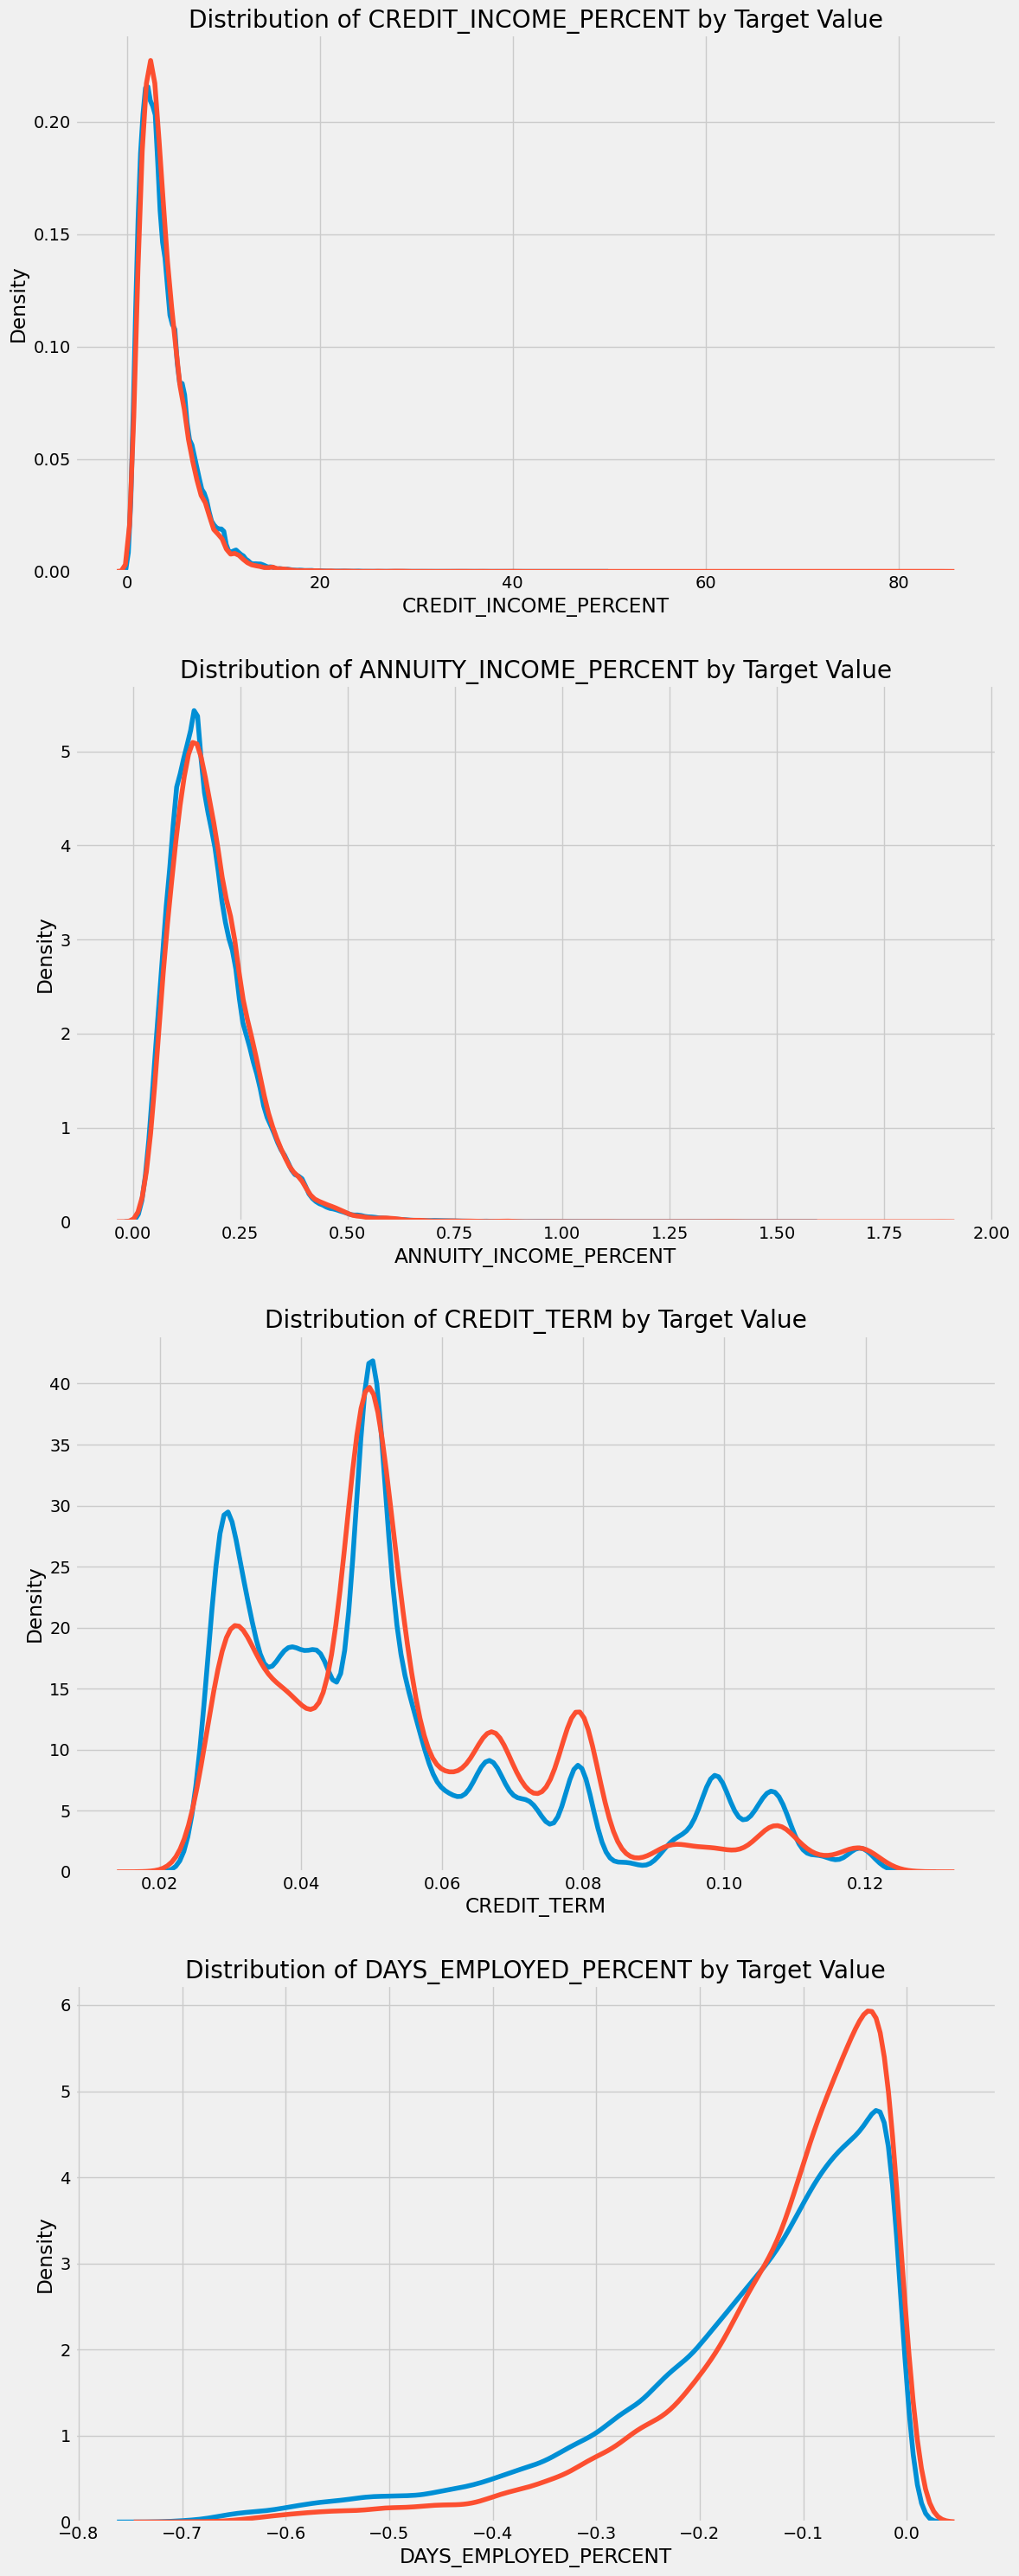

In [41]:
plt.figure(figsize = (12,30))
#iterate through the new features
for i , feature in enumerate(["CREDIT_INCOME_PERCENT", "ANNUITY_INCOME_PERCENT",
                              "CREDIT_TERM", "DAYS_EMPLOYED_PERCENT"]) :

    #create a new subplot for each source
    plt.subplot(4,1, i+1)
    #plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain["TARGET"] == 0 , feature], label = 'taerget == 0')
    #plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain["TARGET"] == 1, feature], label = 'target == 1')
    
    #Label the plots
    plt.title("Distribution of %s by Target Value" % feature)
    plt.xlabel('%s' %feature); plt.ylabel('Density');
    
    plt.tight_layout(h_pad = 2.5)

이러한 새로운 기능이 유용할지 미리 말하기는 어렵습니다. 확실히 말할 수 있는 유일한 방법은 그것들을 시험해 보는 것입니다.

# Baseline
단순한 기준선의 경우, 우리는 테스트 세트의 모든 예제에 대해 동일한 값을 추측할 수 있습니다. 우리는 대출을 상환하지 않을 확률을 예측하도록 요청받았기 때문에, 만약 우리가 완전히 확신하지 못한다면, 우리는 테스트 세트에 대한 모든 관찰에 대해 0.5를 추측할 것입니다. 이것은 경쟁에서 0.5의 Reciever Operating Characteristics Area Under the Curve(AUC ROC)를 얻을 것 입니다.

우리가 어떤 점수르 ㄹ받을지 이미 알고 있기 떄문에, 우리는 단순한 기준선 추측을 할 필요가 없습니다. 실제 기준선을 위해 약간 더 정교한 모델을 사용합니다 : 로지스틱 회귀

## Logistic Regression Implementation
여기서 저는 세부 사항을 설명하기보다는 모델을 구현하는데 집중할 것이지만, 기계 학습 알고리즘 이론에 대해 더 알고 싶은 사람을 위해, 저는 사이킷런과 텐서플로우를 사용한 An Introduction to Satistical Learning과 Hands-On-Machine Learning with Scikit-Learn and Tensorflow을 모두 추천합니다. 이 두 책 모두 모델을 만드는데 필요한 이론과 코드를 제시합니다(각각 R과 python) 그들은 둘 다 배우는 가장 좋은 방법은 해보드는 것이라는 마음 가짐을 가르치며, 그들은 매우 효과적입니다.

기준선을 얻기 위해, 우리는 범주형 변수를 인코딩한 후 모든 기능을 사용할 것입니다. 우리는 누락된 값(임계)을 채우고 기능 범위(기능 확장)를 정규화하여 데이터를 사전 처리할 것입니다. 다음 코드는 이 두 가지 전처리 단계를 모두 수행합니다.

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
# Drop the target from the training data
if 'TARGET' in app_train :
    train = app_train.drop(columns = ["TARGET"])
    
else :
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = "median")

# Scale each feature to 0 - 1
scaler = MinMaxScaler(feature_range = (0,1))

#Fit on the training data
imputer.fit(train)

#Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

print('Training data shape : ', train.shape)
print('Testing data shape :', test.shape)

Training data shape :  (307511, 240)
Testing data shape : (48744, 240)


우리는 첫번째 모델에 사이킷런의 로지스틱회귀 분석을 사용할 것입니다. 기본 모델 설정에서 우리가 할 유일한 변화는 오버피팅의 양을 제어하는 정규화 매개변수 C를 낮추는 것입니다. (낮은 값은 오버피팅을 줄여야 합니다.) 이것은 기본 로지스틱 회귀보다 약간 더 나은 겨로가를 얻을 것이지만, 여전히 미래 모델에 대해 낮은 기준을 설정할 것입니다.

여기서 우리는 친숙한 사이킷런 모델링 구문을 사용합니다. 먼저 모델을 만든 다음 .fit을 사용하여 모델을 훈련시킨 다음, .predict_proba를 사용하여 테스트 데이터에 대한 예측을 합니다(0 또는 1이 아닌 확률을 원한다는 것을 기억하십시오)

In [43]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specifaed regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

이제 그 모델이 훈련되었으므로, 우리는 그것을 예측하는데 사용할 수 있다. 우리는 대출을 지불하지 않을 확률을 에측하고 싶기 때문에 , 모델 predict_proba방법을 사용합니다. 이것은 m이 관측 수인 m x 2 배열을 반환합니다. 첫번째 열은 대상이 0일 확률이고 두번째 열은 대상이 1일 확률입니다.(따라서 단일 행의 경우 두 열을 1로 합산해야합니다.) 우리는 대출이 상환되지 않을 확률을 원하므로, 두번째 열을 선택할 것입니다.

다음 코드는 예측을 하고 올바른 열을 선택합니다.

In [44]:
# Make predictions
# Make sure to select the socond columns only
log_reg_pred = log_reg.predict_proba(test)[:,1]

예측은 sample_submission.csv파일에 표시된 형식이어야하며, SK_ID_CURR과 TARGET의 두 열만 있습니다. 우리는 테스트 세트와 제출이라는 예측에서 이 형식의 데이터 프레임을 만들 것입니다.

In [45]:
# Submission dataframe
submit = app_test[["SK_ID_CURR"]]
submit["TARGET"] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.626095
1,100005,0.526806
2,100013,0.478298
3,100028,0.204984
4,100038,0.347033


그 예측은 대출이 상환되지 않을 0에서 1 사이의 확률을 나타낸다. 만약 우리가 이런한 예측을 사용하여 지원자를 분류한다면, 우리는 대출이 위험하다는 것을 결정하기 위한 확률 임계값을 설정할 수 있습니다.

In [46]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

제출물은 이제 노트북이 실행 중인 가상환경에 저장되었습니다. 제출물에 엑세스하려면, 노트북의 끝에서, 우리는 커널의 오른쪽 상단에 엤는 파란색 커밋 & 실행 버튼을 누를 것입니다. 이것은 전체 노트북이 실행한 다음 실행 중에 생성된 모든 파일을 다운로드하 수  있게 해준다. 

노트북을 실행하면, 생성된 파일은 출력 하위 탭 아래의 버전 탭에서 사용할 수 있습니다. 여기에서 제출 파일을 대회에 제출하거나 다운로드 할 수 있습니다.이 노트북에는 여러 모델이 있기 때문에, 여러 개의 출력 파일이 있을 것입니다.


로지스틱 회귀 기준선은 제출할 때 약 0.671점을 받아야합니다

# Improved Model : Random Forest
기준선의 열악한 성능을 극복하기 위해, 우리는 알고리즘을 업데이트할 수 있습니다. 그것이 성능에 어떤 영향을 미치는지 보기 위해 동일한 훈련 데이터에 랜덤 포레스트를 사용해 봅시다. 랜덤 포레스트는 특히 우리가 수백 그루의 나무를 사용할때 훨씬 더 강력한 모델이다. 우리는 무작위 숲에서 100 그루의 나무를 사용할 것입니다.

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [48]:
# Train on the taining data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, "importance" : feature_importance_values })

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [49]:
# Make a submission dataframe
submit = app_test[["SK_ID_CURR"]]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

이러한 예측은 우리가 전체 노트북을 실행할 때도 사용할 수 있을 것입니다. 

이 모델은 제출할 때 약 0.678점을 받아야합니다.

# Make Predictions using Enginnerd Features
다항식 기능과 도메인 지식이 모델을 개선했는지 확인하는 유일한 방법은 이런한 기능에 대한 모델을 테스트하는 것입니다! 그런 다음 이러한 기능이 없는 모델의 제출 성늘과 비교하여 기능 엔지니어링의 효과를 측정할 수 있습니다.

In [50]:
poly_features_names = list(app_train_poly.columns)

#Imputer the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0,1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100,
                                            random_state = 50, verbose = 1, n_jobs = -1)


이 모델은 경쟁에 제출되었을 때 0.678점을 받았는데, 이는 설계된 기능이 없는 것과 동일하다. 이런한 결과를 감안할 때, 우리의 기능 구성이 이 경우에 도움이 되지 않는 것으로 보인다.

###  Testing Domain Features
이제 우리는 손으로 만드는 도메인 기능을 테스트할 수 있습니다.

In [51]:

app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial featrues
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test  = imputer.fit_transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0,1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state= 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature' : domain_features_names, 
                                           'importance' : feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [52]:
# Make a submisson dataframe
submit = app_test[["SK_ID_CURR"]]
submit["TARGET"] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

이것은 제출 시 0.679점을 받았으며, 이는 아마도 엔지니링 기능이 이 모델에 도움이 되지 않는다는 것을 보여줄 것입니다.(그러나 노트북 끝에 있는 그라디언트 부스팅 모델에 도움이 됩니다.)

이후 노트북에서, 우리는 다른 데이;터 소스이 정보를 사용하여 더 많은 기능 엔지니어링을 할 것이다. 경험상, 이것은 확실히 우리 모델에 도움이 될 것입니다.

# 모델 해석 : 특징의 중요성
어떤 변수가 가장 관련성이 높은지 확인하는 간단한 방법으로 , 우리는 무작위 숲의 특징 중요성을 살펴볼 수 있습니다.우리가 탐색적 데이터 분석에서 본 상관관계를 감안할 때, 우리는 가장 중요한 기능이 EXT_SOURCE와 DAYS_BIRTH일 것으로 예상해야한다.우리는 이런한 피처 중요도를 향후 작업에서 차원 감소의 방법으로 사용할 수 있습니다.

In [53]:
def plot_feature_importances(df) :
    
    """ 
    Plot importances returned by a model. This can work with any measure of 
    feature improtance provided taht higher importance is better.
    
    Args:
        df(dataframe): feature importances. Must have the features in a column
        called 'features' and the importances in a column called importance
    
    Returns :
        shows a plot of the 15 most importance features
        
        df(dataframe) : feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
    """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # Make a horizontal bar chart of feature importance
    plt.figure(figsize = (10,6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
        df["importance_normalized"].head(15),
        align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    
    #Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

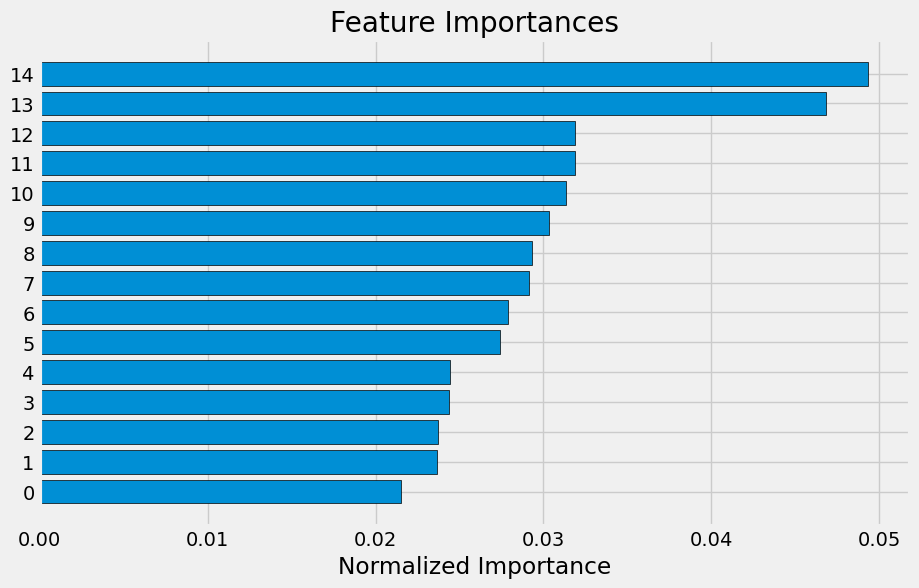

In [54]:
# show the feature importances for thedefault features
feature_importances_sorted = plot_feature_importances(feature_importances)

예상대로, 가장 중요한 기능은 EXT_SOURCE와 DAYS_BIRTH를 다루는 것이다. 우리는 모델에 중요한 기능을 수소만 가지고 있다는 것을 알고 있으며, 이는 성능 저하 없이 많은 기능을 삭제할 수 있음을 시사합니다.(그리고 성능이 증가할 수도 있습니다.) 특징의 중요성은 모델을 해석하거나 차우너 감소를 수행하는 가장 정교한 방법은 아니지만, 모델이 예측할 때 어떤 요소를 고려하는지 이해하기 시작할 수 있게 해줍니다.

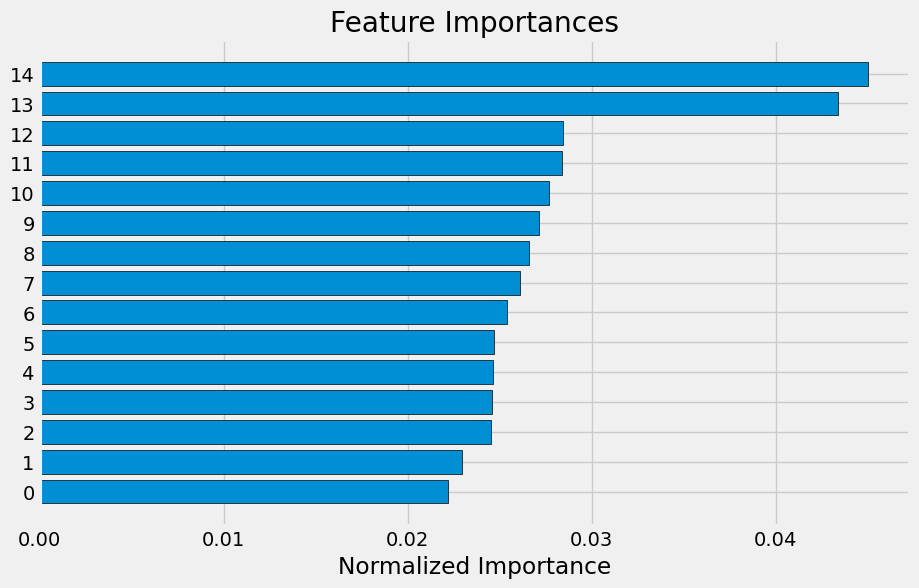

In [55]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

우리는 우리가 손으로 설계한 네가지 기능이 모두 가장 중요한 상위 15위 안에 들었다는 것을 알았습니다! 이것은 우리에게 우리의 도메인 지식이 적어도 부분적으로 궤도에 올랐다는 확신을 주어야합니다.

# 결론
이 노트북에서, 우리는 캐글 기계 학습 대회를 시작하는 방법을 보았다. 우리는 먼저 데이터, 우리의 작업, 그리고 우리의 제출물이 판단될 메트릭을 확실히 이해했다. 그런 다음, 우리는 모델링에 도움이 될 수 있는 관계, 추세 또는 이상을 식별하기 위해 상당히 간단한 EDA를 수행했습니다. 그 과정에서 우리는 범주형 변수를 인코딩하고, 누락된 값을전가하고, 기능을 범위로 확장하는 것과 같은 필요한 전처리 단계를 수행했습니다. 그런 다음, 우리는 그렇게 하는 것이 우리 모델에 도움이 될 수 있는지 확인하기 위해 기존 데이터에서 새로운 기능을 구축했습니다.


데이터 탐색, 데이터 준비 및 기능 엔지니어링이 완료되면, 우리는 개선하고자 하는 기본 모델을 구현했습니다. 그런 다음 우리는 첫번째점수를 이기기 위해 약간 더 복잡한 두 번쨰 모델을 만들었습니다. 우리는 또한 언지니어링 변수를 추가하는 효과를 결정하기 위한 실험을 수행했습니다. 

우리는 기계 학습 프로젝트의 일반적인 개요를 따랐습니다:
1. 문제와 데이터를 이해하세요.
2. 데이터 정리 및 포맷( 이것은 대부분 우리를 위해 이루어졌스빈다)
3. 탐색적 데이터 분석
4. 기준선 모델
5. 개선된 모델
6. 모델 해석 (조금만)


기계학습 대회는 우리가 단일 메트릭에서 최고의 성능을 달성하는 데만 관심이 있고 해석에 신경 쓰지 않는다는 점에서 일반적인 데이터 과학 문제와 약간 다릅니다. 그러나, 우리의 모델이 어떻게 결정을 내리는지 이해하려고 시도함으로써, 우리는 오류를 바로잡기 위해 그것들을 개선하거나 실수를 조사할 수 있스빈다. 미래의 노트북에서 우리는 더 많은 데이터 소스를 통합하고, 더 복잡한 모델을 구축하고( 다른 사람들의 코드에 따라), 점수를 개선하는 것을 살펴볼 것입니다.

이 노트북이 이 기계 학습 대회에서 당신을 시작하고 실행할 수 있기를 바라며, 이제 커뮤니티의 도움을 받아 스스로 나가서 몇 가지 큰 문제를 해결할 준비가 되었기를 바랍니다!

# Just for Fun : Light Gradiant Boosting Machine
이제 ( 원하는 경우, 이 부분은 전적으로 선택 사항입니다) 우리는 딥 엔드에서 벗어나 실제 기계 학습 모델을 사용할 수 있습니다.:LightGBM 라이브러리를 사용하는 그라디언트 부스팅 기계!
그라디언트 부트팅 머신은 현재 구조화된 데이터 세트에 대한 학습을 위한 선도적인 모델이며, 경쟁에서 잘하기 위해서는 이 모델의 어떤 형태가 필요할 것입니다. 걱정하지 마세요, 이 코드가 위협적으로 보이더라도, 그것은 완전한 모델로 구축되는 일련의 작은 단계일 뿐입니다. 나는 이 프로젝트를 위해 무엇이 준비되어 있는지 보여주기 위해 이 코드를 추가했고, 리더보드에서 약간 더 나은 점수르 얻기 때문입니다. 미래의 노트북에서 우리는 고급모델(대부분 기존 코드를 더 잘 작동하도록 조정하는 것을 의미함), 기능 엔지니어링 및 기능 선택으로 작업하는 방법을 보게 될 것입니다. 

In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [ ]:
submission, fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 239)
Testing Data Shape:  (48744, 239)


In [ ]:
fi_sorted = plot_feature_importances(fi)

In [ ]:
submission.to_csv('baseline_lgb.csv', index = False)

이 제출은 리더보드에서 약 0.735점을 받아야합니다. 

In [ ]:
app_train_domain['TARGET'] = train_labels

# Test teh domain knowledge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrics')
print(metrics_domain)

In [ ]:
fi_sorted = plot_feature_improtances(fi_domain)

다시 말지만, 우리는 우리의 특징 중 일부가 그것을 가장 중요하게 만들었다는 것을 알 수 있습니다. 앞으로 , 우리는 이 문제에 유용할 수 있다는 다른 도메인 지식 기능에 대해 생각해야할 것입니다.( 또는 금융산업에 대해 더 많이 아는 사람과 상의해야 합니다.

In [ ]:
submission_domain.to_csv('baseline_lgb_domain_featrues.csv', index = False)

이 모델은 도메인 기능이 성능을 향상시킨다는 것을 나타내는 공개 리더보드에 제출될 때 약 0.754점을 받았습니다. 엔진 피처니어링은 이 대회에서 중요한 부분이 될 것입니다.( 모든 기계 학습 문제도 마찬가지)